<a href="https://colab.research.google.com/github/novianaramadhani/DataMining/blob/main/006_Noviana_Ramadhani_Tugas1_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Noviana Ramadhani**

**NIM : 2109116006**

**Kelas : Sistem Informasi A 2021**

**Ketentuan Tugas 1 Penggalian Data dan Analitika Proses Bisnis**

1.Buatlah analisis menggunakan dataset retail, 

2.tampilkan kombinasi barang dengan metode apriori

3.lakukan forcasting  4 month Customer Lifetime Value

terdapat 34 kategori berdasarkan BRANCHNAME_SPLR, jadi 1 kategori dilakukan oleh 1 atau 2 orang

pembagiannya terserah kalian

#**1.Analisis Dataset Retail**

Analisis asosiasi atau association rule mining adalah teknik data mining untuk menemukan aturan assosiatif antara suatu kombinasi item (Mengetahui hubungan antara satu atribut dengan yang lainnya). Contoh aturan assosiatif dari analisa pembelian di suatu pasar swalayan contohnya adalah dapat diketahuinya berapa besar kemungkinan seorang pelanggan membeli roti bersamaan dengan susu. Dengan pengetahuan tersebut pemilik pasar swalayan dapat mengatur penempatan barangnya atau merancang kampanye pemasaran dengan memakai kupon diskon untuk kombinasi barang tertentu.

Terdapat tahapan dalam analisis, yaitu:
1. Data Selection
2. Data Pre-processing
3. Data Mining
4. Interpretation/evaluation

##Data Selection

In [ ]:
# Menyambungkan ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mlxtend  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=74dcfa5a01fe3f028cb2cae2e6145dc43f9bd391a03546a4821cb756564658ac
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [ ]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/dataset/market.xlsx')

In [ ]:
# Tampilkan data
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [ ]:
# Buat dataset dengan label target 'Kudus'
df2 = df[df["BRANCHNAME_SPLR"]=="KUDUS"]

In [ ]:
dfnew = pd.DataFrame(df2)

In [ ]:
dfnew

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65,536374,2020-12-01 09:09:00,45,KUDUS,A2724,8992388112791,21258,ABC MIE EAT&GO BASO AYAM 60G,MINUMAN,32,...,15100.0,NASUKA (KD-WATES),JL.RAYA WATES BARAT PS WATES KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
91,536378,2020-12-01 09:37:00,45,KUDUS,A2781,711844120341,84997C,ABC SAMBAL EXTRA REDAS 24SX9G,SYRUP,6,...,14688.0,ARIL DIVA (KD03-TANJUNG)*,TANJUNG,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
97,536378,2020-12-01 09:37:00,45,KUDUS,A2411,711844130319,21975,ABC SAOS TOMAT SASET 9G24,BUMBU,24,...,14688.0,DIAH (KD-HONGGOSOCO),KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
102,536378,2020-12-01 09:37:00,45,KUDUS,A2392,711844330115,85071B,ABC SARDINES CHILI 425G,MAKANAN KALENG,96,...,14688.0,NIHAR PRATAMA (KD-TUGU LOR),TUGU LOR,DEMAK,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
103,536378,2020-12-01 09:37:00,45,KUDUS,A2661,711844330337,21931,ABC SARDINES MACKEREL EXTRA PDS 425,KECAP & SAUCE,10,...,14688.0,EST (J603-JL LEBAK BULUNGAN),JLN LEBAK BULUNGAN,JEPARA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387463,C570290,2021-10-10 11:54:00,45,KUDUS,T2276,8999999018672,21175,TARO CHILLIKONG 40PACKS@16GR,SNACK,-12,...,14665.0,TOBIT (PW-BRATI),JL RAYA BRATI KLAMBU,PATI,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
387464,C570290,2021-10-10 11:54:00,45,KUDUS,T2273,8999999018658,21166,TARO CHICKENZILLA 40PACK@16GR,SNACK,-12,...,14665.0,BUDI (KD-KRANDON),KRANDON RT 1 / 3,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
387465,C570290,2021-10-10 11:54:00,45,KUDUS,T2268,6936968724785,21137,TAMIYA MAGNUM,LAIN-LAIN,-4,...,14665.0,DISHUB (KD-PURWOSARI),PURWOSARI KUDUS,KUDUS,JAWA TENGAH,INDONESIA,78,Institusi,450202,CV. CAHYO SELAMANYA
387466,C570290,2021-10-10 11:54:00,45,KUDUS,T2262,8992979190474,84029G,TOTAL PELANGI 6SACH@78 GR,DETERGEN,-8,...,14665.0,YANTI (KD-TANJUNG TEJO),TANJUNG TEJO,KENDAL,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA


In [ ]:
# Lihat tipe data
dfnew.dtypes

InvoiceNo                      object
InvoiceDate            datetime64[ns]
BRANCH_SPLR                     int64
BRANCHNAME_SPLR                object
warehouseProductsID            object
BARCODEID                       int64
StockCode                      object
PRODUCT                        object
PRODUCT_CATEGORY               object
Quantity                        int64
UnitPrice                     float64
UnitPriceRupiah               float64
oldCUSTID                      object
CustomerID                    float64
CUSTNAME                       object
ADDRESS                        object
KOTA                           object
PROVINSI                       object
NEGARA                         object
CHANNELID_SPLR                  int64
CHANNELNAME_SPLR               object
SUBDISTID                       int64
SUBDIST_NAME                   object
dtype: object

In [ ]:
# Menampilkan info dataset (df.info())
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54044 entries, 65 to 387467
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            54044 non-null  object        
 1   InvoiceDate          54044 non-null  datetime64[ns]
 2   BRANCH_SPLR          54044 non-null  int64         
 3   BRANCHNAME_SPLR      54044 non-null  object        
 4   warehouseProductsID  54044 non-null  object        
 5   BARCODEID            54044 non-null  int64         
 6   StockCode            54044 non-null  object        
 7   PRODUCT              54044 non-null  object        
 8   PRODUCT_CATEGORY     54044 non-null  object        
 9   Quantity             54044 non-null  int64         
 10  UnitPrice            54044 non-null  float64       
 11  UnitPriceRupiah      54044 non-null  float64       
 12  oldCUSTID            54044 non-null  object        
 13  CustomerID           43745 no

In [ ]:
# Describe data
dfnew.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,54044.0,5.404400e+04,54044.000000,54044.000000,5.404400e+04,43745.000000,54044.000000,54044.0
mean,45.0,8.069298e+12,10.397065,3.805558,5.441948e+04,15238.882912,33.720228,450202.0
std,0.0,2.595269e+12,44.417202,33.590495,4.803441e+05,1675.650939,7.482907,0.0
min,45.0,7.000000e+00,-2880.000000,0.000000,0.000000e+00,12347.000000,14.000000,450202.0
25%,45.0,8.887229e+12,1.000000,1.250000,1.787500e+04,13927.000000,32.000000,450202.0
50%,45.0,8.992929e+12,4.000000,2.080000,2.974400e+04,15114.000000,32.000000,450202.0
75%,45.0,8.998103e+12,12.000000,4.130000,5.905900e+04,16669.000000,32.000000,450202.0
max,45.0,7.770247e+13,2400.000000,5942.570000,8.497875e+07,18283.000000,93.000000,450202.0


In [ ]:
# Menampilkan kolom BRANCHNAME_SPLR
pd.unique(dfnew.BRANCHNAME_SPLR)

array(['KUDUS'], dtype=object)

In [ ]:
dfnew.nunique()

InvoiceNo              3621
InvoiceDate            3345
BRANCH_SPLR               1
BRANCHNAME_SPLR           1
warehouseProductsID    3432
BARCODEID              3432
StockCode              3166
PRODUCT                3430
PRODUCT_CATEGORY         51
Quantity                257
UnitPrice               387
UnitPriceRupiah         387
oldCUSTID              1487
CustomerID             1782
CUSTNAME               1488
ADDRESS                1258
KOTA                     20
PROVINSI                  1
NEGARA                    1
CHANNELID_SPLR           21
CHANNELNAME_SPLR         21
SUBDISTID                 1
SUBDIST_NAME              1
dtype: int64

In [ ]:
# Menampilkan data 5 baris pertama
dfnew.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65,536374,2020-12-01 09:09:00,45,KUDUS,A2724,8992388112791,21258,ABC MIE EAT&GO BASO AYAM 60G,MINUMAN,32,...,15100.0,NASUKA (KD-WATES),JL.RAYA WATES BARAT PS WATES KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
91,536378,2020-12-01 09:37:00,45,KUDUS,A2781,711844120341,84997C,ABC SAMBAL EXTRA REDAS 24SX9G,SYRUP,6,...,14688.0,ARIL DIVA (KD03-TANJUNG)*,TANJUNG,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
97,536378,2020-12-01 09:37:00,45,KUDUS,A2411,711844130319,21975,ABC SAOS TOMAT SASET 9G24,BUMBU,24,...,14688.0,DIAH (KD-HONGGOSOCO),KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
102,536378,2020-12-01 09:37:00,45,KUDUS,A2392,711844330115,85071B,ABC SARDINES CHILI 425G,MAKANAN KALENG,96,...,14688.0,NIHAR PRATAMA (KD-TUGU LOR),TUGU LOR,DEMAK,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
103,536378,2020-12-01 09:37:00,45,KUDUS,A2661,711844330337,21931,ABC SARDINES MACKEREL EXTRA PDS 425,KECAP & SAUCE,10,...,14688.0,EST (J603-JL LEBAK BULUNGAN),JLN LEBAK BULUNGAN,JEPARA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA


In [ ]:
# Menampilkan nilai rata-rata, min, max, dan standar deviasi untuk kolom Age
dfnew.agg({"Quantity": ["mean", "min", "max", "std"]})

,Quantity
mean,10.397065
min,-2880.000000
max,2400.000000
std,44.417202


In [ ]:
dfnew.shape

(54044, 23)

##Data Pre-processing


###Data Cleansing

In [ ]:
dfnew.head(6)

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65,536374,2020-12-01 09:09:00,45,KUDUS,A2724,8992388112791,21258,ABC MIE EAT&GO BASO AYAM 60G,MINUMAN,32,...,15100.0,NASUKA (KD-WATES),JL.RAYA WATES BARAT PS WATES KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
91,536378,2020-12-01 09:37:00,45,KUDUS,A2781,711844120341,84997C,ABC SAMBAL EXTRA REDAS 24SX9G,SYRUP,6,...,14688.0,ARIL DIVA (KD03-TANJUNG)*,TANJUNG,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
97,536378,2020-12-01 09:37:00,45,KUDUS,A2411,711844130319,21975,ABC SAOS TOMAT SASET 9G24,BUMBU,24,...,14688.0,DIAH (KD-HONGGOSOCO),KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
102,536378,2020-12-01 09:37:00,45,KUDUS,A2392,711844330115,85071B,ABC SARDINES CHILI 425G,MAKANAN KALENG,96,...,14688.0,NIHAR PRATAMA (KD-TUGU LOR),TUGU LOR,DEMAK,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
103,536378,2020-12-01 09:37:00,45,KUDUS,A2661,711844330337,21931,ABC SARDINES MACKEREL EXTRA PDS 425,KECAP & SAUCE,10,...,14688.0,EST (J603-JL LEBAK BULUNGAN),JLN LEBAK BULUNGAN,JEPARA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
164,536384,2020-12-01 09:53:00,45,KUDUS,A2581,3412244560054,22189,ADIDAS DEO SPRAY WOMEN 150ML FRUITY,KOSMETIK,4,...,18074.0,PT BENGAWAN R.M (LUWES PURWODADI),/JL ADI SUMARMO NO 95 NGABEYAN KARTOSURO,BLORA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA


In [ ]:
# Mengganti kolom PERIODE menjadi tipe data datetime
dfnew['InvoiceDate'] = pd.to_datetime(dfnew['InvoiceDate'])

In [ ]:
# Menghapus spasi pada kolom PRODUCT & PRODUCT_CATEGORY serta menghapus baris yang memiliki nilai yang hilang pada kolom InvoiceNo
dfnew['PRODUCT'] = dfnew['PRODUCT'].str.strip()
dfnew['PRODUCT_CATEGORY'] = dfnew['PRODUCT_CATEGORY'].str.strip()

dfnew.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [ ]:
# menghapus variabel inoviceNo yang diawali dengan huruf C pada invoice numbernya
dfnew['InvoiceNo'] = dfnew['InvoiceNo'].astype('str')
dfnew = dfnew[~(dfnew['InvoiceNo'].str[0] == 'C')]

###Data Transformation

In [ ]:
dfnew

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65,536374,2020-12-01 09:09:00,45,KUDUS,A2724,8992388112791,21258,ABC MIE EAT&GO BASO AYAM 60G,MINUMAN,32,...,15100.0,NASUKA (KD-WATES),JL.RAYA WATES BARAT PS WATES KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
91,536378,2020-12-01 09:37:00,45,KUDUS,A2781,711844120341,84997C,ABC SAMBAL EXTRA REDAS 24SX9G,SYRUP,6,...,14688.0,ARIL DIVA (KD03-TANJUNG)*,TANJUNG,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
97,536378,2020-12-01 09:37:00,45,KUDUS,A2411,711844130319,21975,ABC SAOS TOMAT SASET 9G24,BUMBU,24,...,14688.0,DIAH (KD-HONGGOSOCO),KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
102,536378,2020-12-01 09:37:00,45,KUDUS,A2392,711844330115,85071B,ABC SARDINES CHILI 425G,MAKANAN KALENG,96,...,14688.0,NIHAR PRATAMA (KD-TUGU LOR),TUGU LOR,DEMAK,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
103,536378,2020-12-01 09:37:00,45,KUDUS,A2661,711844330337,21931,ABC SARDINES MACKEREL EXTRA PDS 425,KECAP & SAUCE,10,...,14688.0,EST (J603-JL LEBAK BULUNGAN),JLN LEBAK BULUNGAN,JEPARA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387454,570289,2021-10-10 11:50:00,45,KUDUS,T2418,6933058066664,47566,TALENAN KAYU PETAK B,ALAT RUMAH TANGGA,2,...,17377.0,ENAM ENAM (BL-BLORA),SAMPING HOTEL KINI JAYA,BLORA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
387455,570289,2021-10-10 11:50:00,45,KUDUS,T2417,6933058066701,23298,TALENAN KAYU PETAK S,ALAT RUMAH TANGGA,2,...,17377.0,EKA PUTRA (PT03-JL JUANA -JAKENAN),JL RAYA JUWANA - JAKENAN,PATI,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
387456,570289,2021-10-10 11:50:00,45,KUDUS,T2410,8991001781291,47566B,TWISTER BLACK COCOAWAFER STICK 156,OBATAN,2,...,17377.0,SIDO MUNCUL (J802-WELAHAN),*JL RAYA WELAHAN PAS TIKUNGAN,TAYU,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
387457,570289,2021-10-10 11:50:00,45,KUDUS,T2406,749921000378,22866,T/S HI LO JOINT +ORANGE,DIET FOOD,2,...,17377.0,TASYA (JP-BANYU PUTIH),BANYU PUTIH,JEPARA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA


In [ ]:
kudus1 = (dfnew[dfnew['BRANCHNAME_SPLR'] =="KUDUS"].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('InvoiceNo'))
kudus1.head()

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536378,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
536384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menampilkan subset kolum
kudus1.iloc[:,[0,1,2,3,4,5,6,7]].head()

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN
InvoiceNo,,,,,,,,
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536378,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

kudus1_sets = kudus1.applymap(encode_units)
kudus1_sets.head(5)

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536378,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
536384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Data Mining

Data mining dapat dikenal juga dengan istilah data exploration

###**2.Menampilkan kombinasi barang dengan metode apriori**

In [ ]:
kudus1_sets

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536378,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
536384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570285,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,1,1,0,0
570286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570287,0,1,1,0,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
dfk = kudus1_sets
dfk

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536378,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
536384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570285,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,1,1,0,0
570286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570287,0,1,1,0,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
# 1 Item set buat nampilkan berapa set tiap item
dfk.sum()

PRODUCT_CATEGORY
ALAT LISTRIK           82
ALAT RUMAH TANGGA    1010
BEER                  115
BERAS                  83
BISKUIT              1082
BUMBU                 623
COKELAT               483
DETERGEN              908
DIET FOOD             154
ELEKTRONIK            257
ES                    173
GULAPUTIH              43
KACANG TANAH           27
KAPAS                 195
KECAP & SAUCE         311
KONSINYASI             31
KOSMETIK             1249
LAIN-LAIN             186
MAKANAN               229
MAKANAN BAYI          257
MAKANAN HEWAN          15
MAKANAN KALENG        360
MAKANAN PAGI          178
MANISAN               335
MENTEGA               119
MIE                   402
MINUMAN              1235
MINYAK GORENG         272
MINYAK RAMBUT         293
OBATAN                963
PAKAIAN               109
PAMPERS               510
PARFUM               1055
PASTA & S-GIGI        491
PECAH BELAH           271
PEMBALUT WANITA       192
PEMBERSIH              42
PERMEN               

In [ ]:
# Menampilkan item
dfk.columns

Index(['ALAT LISTRIK', 'ALAT RUMAH TANGGA', 'BEER', 'BERAS', 'BISKUIT',
       'BUMBU', 'COKELAT', 'DETERGEN', 'DIET FOOD', 'ELEKTRONIK', 'ES',
       'GULAPUTIH', 'KACANG TANAH', 'KAPAS', 'KECAP & SAUCE', 'KONSINYASI',
       'KOSMETIK', 'LAIN-LAIN', 'MAKANAN', 'MAKANAN BAYI', 'MAKANAN HEWAN',
       'MAKANAN KALENG', 'MAKANAN PAGI', 'MANISAN', 'MENTEGA', 'MIE',
       'MINUMAN', 'MINYAK GORENG', 'MINYAK RAMBUT', 'OBATAN', 'PAKAIAN',
       'PAMPERS', 'PARFUM', 'PASTA & S-GIGI', 'PECAH BELAH', 'PEMBALUT WANITA',
       'PEMBERSIH', 'PERMEN', 'PRODUCT BAYI', 'ROKOK', 'SABUN & SAMPHOO',
       'SEMIR SEPATU', 'SLAI/JAM', 'SNACK', 'STATIONERY', 'SUSU', 'SYRUP',
       'TANDAS', 'TEH & KOPI', 'TEPUNG', 'TISSUE'],
      dtype='object', name='PRODUCT_CATEGORY')

In [ ]:
# 2 Item set = kombinasi 2 item
from itertools import permutations # library untuk membuat kombinasi barang

# Extract unique items.
rules = list(permutations(dfk.columns, 2))
rules

[('ALAT LISTRIK', 'ALAT RUMAH TANGGA'),
 ('ALAT LISTRIK', 'BEER'),
 ('ALAT LISTRIK', 'BERAS'),
 ('ALAT LISTRIK', 'BISKUIT'),
 ('ALAT LISTRIK', 'BUMBU'),
 ('ALAT LISTRIK', 'COKELAT'),
 ('ALAT LISTRIK', 'DETERGEN'),
 ('ALAT LISTRIK', 'DIET FOOD'),
 ('ALAT LISTRIK', 'ELEKTRONIK'),
 ('ALAT LISTRIK', 'ES'),
 ('ALAT LISTRIK', 'GULAPUTIH'),
 ('ALAT LISTRIK', 'KACANG TANAH'),
 ('ALAT LISTRIK', 'KAPAS'),
 ('ALAT LISTRIK', 'KECAP & SAUCE'),
 ('ALAT LISTRIK', 'KONSINYASI'),
 ('ALAT LISTRIK', 'KOSMETIK'),
 ('ALAT LISTRIK', 'LAIN-LAIN'),
 ('ALAT LISTRIK', 'MAKANAN'),
 ('ALAT LISTRIK', 'MAKANAN BAYI'),
 ('ALAT LISTRIK', 'MAKANAN HEWAN'),
 ('ALAT LISTRIK', 'MAKANAN KALENG'),
 ('ALAT LISTRIK', 'MAKANAN PAGI'),
 ('ALAT LISTRIK', 'MANISAN'),
 ('ALAT LISTRIK', 'MENTEGA'),
 ('ALAT LISTRIK', 'MIE'),
 ('ALAT LISTRIK', 'MINUMAN'),
 ('ALAT LISTRIK', 'MINYAK GORENG'),
 ('ALAT LISTRIK', 'MINYAK RAMBUT'),
 ('ALAT LISTRIK', 'OBATAN'),
 ('ALAT LISTRIK', 'PAKAIAN'),
 ('ALAT LISTRIK', 'PAMPERS'),
 ('ALAT LISTRIK', '

In [ ]:
# Memfilter pada item kombinasi, kemudian hitung item yang muncul saja
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(dfk[(dfk[rule[0]]==1) & (dfk[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('ALAT LISTRIK', 'ALAT RUMAH TANGGA'),
 ('ALAT LISTRIK', 'BEER'),
 ('ALAT LISTRIK', 'BERAS'),
 ('ALAT LISTRIK', 'BISKUIT'),
 ('ALAT LISTRIK', 'BUMBU'),
 ('ALAT LISTRIK', 'COKELAT'),
 ('ALAT LISTRIK', 'DETERGEN'),
 ('ALAT LISTRIK', 'DIET FOOD'),
 ('ALAT LISTRIK', 'ELEKTRONIK'),
 ('ALAT LISTRIK', 'ES'),
 ('ALAT LISTRIK', 'GULAPUTIH'),
 ('ALAT LISTRIK', 'KAPAS'),
 ('ALAT LISTRIK', 'KECAP & SAUCE'),
 ('ALAT LISTRIK', 'KOSMETIK'),
 ('ALAT LISTRIK', 'LAIN-LAIN'),
 ('ALAT LISTRIK', 'MAKANAN'),
 ('ALAT LISTRIK', 'MAKANAN BAYI'),
 ('ALAT LISTRIK', 'MAKANAN HEWAN'),
 ('ALAT LISTRIK', 'MAKANAN KALENG'),
 ('ALAT LISTRIK', 'MAKANAN PAGI'),
 ('ALAT LISTRIK', 'MANISAN'),
 ('ALAT LISTRIK', 'MENTEGA'),
 ('ALAT LISTRIK', 'MIE'),
 ('ALAT LISTRIK', 'MINUMAN'),
 ('ALAT LISTRIK', 'MINYAK GORENG'),
 ('ALAT LISTRIK', 'MINYAK RAMBUT'),
 ('ALAT LISTRIK', 'OBATAN'),
 ('ALAT LISTRIK', 'PAKAIAN'),
 ('ALAT LISTRIK', 'PAMPERS'),
 ('ALAT LISTRIK', 'PARFUM'),
 ('ALAT LISTRIK', 'PASTA & S-GIGI'),
 ('ALAT LISTRIK', 'PE

In [ ]:
hitung = {} # Mengganti dictionary
for rule in rule_baru:
  banyak_data= len(dfk[
      (dfk[rule[0]]==1) & (dfk[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('ALAT LISTRIK', 'ALAT RUMAH TANGGA')": 58,
 "('ALAT LISTRIK', 'BEER')": 14,
 "('ALAT LISTRIK', 'BERAS')": 9,
 "('ALAT LISTRIK', 'BISKUIT')": 51,
 "('ALAT LISTRIK', 'BUMBU')": 50,
 "('ALAT LISTRIK', 'COKELAT')": 44,
 "('ALAT LISTRIK', 'DETERGEN')": 53,
 "('ALAT LISTRIK', 'DIET FOOD')": 20,
 "('ALAT LISTRIK', 'ELEKTRONIK')": 38,
 "('ALAT LISTRIK', 'ES')": 7,
 "('ALAT LISTRIK', 'GULAPUTIH')": 6,
 "('ALAT LISTRIK', 'KAPAS')": 26,
 "('ALAT LISTRIK', 'KECAP & SAUCE')": 36,
 "('ALAT LISTRIK', 'KOSMETIK')": 61,
 "('ALAT LISTRIK', 'LAIN-LAIN')": 19,
 "('ALAT LISTRIK', 'MAKANAN')": 16,
 "('ALAT LISTRIK', 'MAKANAN BAYI')": 25,
 "('ALAT LISTRIK', 'MAKANAN HEWAN')": 7,
 "('ALAT LISTRIK', 'MAKANAN KALENG')": 44,
 "('ALAT LISTRIK', 'MAKANAN PAGI')": 19,
 "('ALAT LISTRIK', 'MANISAN')": 18,
 "('ALAT LISTRIK', 'MENTEGA')": 16,
 "('ALAT LISTRIK', 'MIE')": 34,
 "('ALAT LISTRIK', 'MINUMAN')": 59,
 "('ALAT LISTRIK', 'MINYAK GORENG')": 26,
 "('ALAT LISTRIK', 'MINYAK RAMBUT')": 27,
 "('ALAT LISTRIK', 'OBAT

In [ ]:
# untuk melihat banyak transaksi
len(dfk)

3182

In [ ]:
# List support
# supp = [i/len(dfm)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(dfk)*100}%")

---
('ALAT LISTRIK', 'ALAT RUMAH TANGGA') support = 1.8227529855436833%
('ALAT LISTRIK', 'BEER') support = 0.43997485857950974%
('ALAT LISTRIK', 'BERAS') support = 0.28284098051539913%
('ALAT LISTRIK', 'BISKUIT') support = 1.6027655562539285%
('ALAT LISTRIK', 'BUMBU') support = 1.571338780641106%
('ALAT LISTRIK', 'COKELAT') support = 1.3827781269641735%
('ALAT LISTRIK', 'DETERGEN') support = 1.6656191074795725%
('ALAT LISTRIK', 'DIET FOOD') support = 0.6285355122564426%
('ALAT LISTRIK', 'ELEKTRONIK') support = 1.1942174732872406%
('ALAT LISTRIK', 'ES') support = 0.21998742928975487%
('ALAT LISTRIK', 'GULAPUTIH') support = 0.18856065367693275%
('ALAT LISTRIK', 'KAPAS') support = 0.8170961659333752%
('ALAT LISTRIK', 'KECAP & SAUCE') support = 1.1313639220615965%
('ALAT LISTRIK', 'KOSMETIK') support = 1.9170333123821497%
('ALAT LISTRIK', 'LAIN-LAIN') support = 0.5971087366436203%
('ALAT LISTRIK', 'MAKANAN') support = 0.502828409805154%
('ALAT LISTRIK', 'MAKANAN BAYI') support = 0.78566939

In [ ]:
dfk["PARFUM"].sum()

1055

In [ ]:
# List Confidence
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) # Mengubah string ke list
  print(f"{i[0]}->{i[1]}  Confidence = {ab/dfk[i[0]].sum()*100}%")

---
ALAT LISTRIK->ALAT RUMAH TANGGA  Confidence = 70.73170731707317%
ALAT LISTRIK->BEER  Confidence = 17.073170731707318%
ALAT LISTRIK->BERAS  Confidence = 10.975609756097562%
ALAT LISTRIK->BISKUIT  Confidence = 62.19512195121951%
ALAT LISTRIK->BUMBU  Confidence = 60.97560975609756%
ALAT LISTRIK->COKELAT  Confidence = 53.65853658536586%
ALAT LISTRIK->DETERGEN  Confidence = 64.63414634146342%
ALAT LISTRIK->DIET FOOD  Confidence = 24.390243902439025%
ALAT LISTRIK->ELEKTRONIK  Confidence = 46.34146341463415%
ALAT LISTRIK->ES  Confidence = 8.536585365853659%
ALAT LISTRIK->GULAPUTIH  Confidence = 7.317073170731707%
ALAT LISTRIK->KAPAS  Confidence = 31.70731707317073%
ALAT LISTRIK->KECAP & SAUCE  Confidence = 43.90243902439025%
ALAT LISTRIK->KOSMETIK  Confidence = 74.39024390243902%
ALAT LISTRIK->LAIN-LAIN  Confidence = 23.170731707317074%
ALAT LISTRIK->MAKANAN  Confidence = 19.51219512195122%
ALAT LISTRIK->MAKANAN BAYI  Confidence = 30.48780487804878%
ALAT LISTRIK->MAKANAN HEWAN  Confidence

In [ ]:
# Build up the frequent items, the rules, and model
# Perintah yang di gunakan adalah apriori, dengan data dari smd_sets dengan minimum nilai support 0.1/ 10%.
frequent_itemsets = apriori(kudus1_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.317410,(ALAT RUMAH TANGGA)
1,0.340038,(BISKUIT)
2,0.195789,(BUMBU)
3,0.151791,(COKELAT)
4,0.285355,(DETERGEN)
...,...,...
379,0.103394,"(BISKUIT, OBATAN, SUSU, KOSMETIK, MINUMAN)"
380,0.104337,"(BISKUIT, SABUN & SAMPHOO, KOSMETIK, MINUMAN, ..."
381,0.108422,"(BISKUIT, SUSU, SABUN & SAMPHOO, KOSMETIK, MIN..."
382,0.102766,"(OBATAN, SUSU, SABUN & SAMPHOO, KOSMETIK, MINU..."


In [ ]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISKUIT),(ALAT RUMAH TANGGA),0.340038,0.317410,0.174419,0.512939,1.616012,0.066487,1.401446
1,(ALAT RUMAH TANGGA),(BISKUIT),0.317410,0.340038,0.174419,0.549505,1.616012,0.066487,1.464971
2,(ALAT RUMAH TANGGA),(BUMBU),0.317410,0.195789,0.111565,0.351485,1.795226,0.049420,1.240081
3,(BUMBU),(ALAT RUMAH TANGGA),0.195789,0.317410,0.111565,0.569823,1.795226,0.049420,1.586766
4,(ALAT RUMAH TANGGA),(DETERGEN),0.317410,0.285355,0.154620,0.487129,1.707096,0.064045,1.393420


In [ ]:
#Melakukan filter untuk nilai lift ratio lebih dari sama dengan 1 dengan tingkat confidence minimal 0.3 (lebih dari sama dengan 30%)
result1 = rules1[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.3)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2359,"(OBATAN, PERMEN, SABUN & SAMPHOO)",(MINUMAN),0.111879,0.388121,0.102766,0.918539,2.366633,0.059343,7.511346
2518,"(OBATAN, SUSU, KOSMETIK, SABUN & SAMPHOO)",(MINUMAN),0.111879,0.388121,0.102766,0.918539,2.366633,0.059343,7.511346
1770,"(BISKUIT, OBATAN, PERMEN)",(MINUMAN),0.111565,0.388121,0.102451,0.918310,2.366042,0.059151,7.490247
2489,"(BISKUIT, MINUMAN, SUSU, SABUN & SAMPHOO)",(KOSMETIK),0.118165,0.392520,0.108422,0.917553,2.337593,0.062040,7.368139
2428,"(BISKUIT, OBATAN, SUSU, KOSMETIK)",(MINUMAN),0.112822,0.388121,0.103394,0.916435,2.361210,0.059605,7.322156


In [ ]:
#Lift Ratio adalah suatu ukuran (parameter) untuk mengetahui kekuatan aturan asosiasi (association rule) yang telah terbentuk dari nilai support
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SNACK),(BUMBU),0.265871,0.195789,0.107480,0.404255,2.064752,0.055425,1.349926
1,(BUMBU),(SNACK),0.195789,0.265871,0.107480,0.548957,2.064752,0.055425,1.627625
2,(SUSU),(BUMBU),0.314582,0.195789,0.126650,0.402597,2.056284,0.065058,1.346180
3,(BUMBU),(SUSU),0.195789,0.314582,0.126650,0.646870,2.056284,0.065058,1.940979
4,(TANDAS),(DETERGEN),0.156820,0.285355,0.101194,0.645291,2.261360,0.056445,2.014733


In [ ]:
result2 = rules2[ (rules2['lift'] >= 1) &
                (rules2['confidence'] >= 0.3) ]

best_result = result2.sort_values(by='confidence', ascending=False)
best_result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2214,"(OBATAN, SUSU, KOSMETIK, SABUN & SAMPHOO)",(MINUMAN),0.111879,0.388121,0.102766,0.918539,2.366633,0.059343,7.511346
2055,"(OBATAN, PERMEN, SABUN & SAMPHOO)",(MINUMAN),0.111879,0.388121,0.102766,0.918539,2.366633,0.059343,7.511346
1466,"(BISKUIT, OBATAN, PERMEN)",(MINUMAN),0.111565,0.388121,0.102451,0.918310,2.366042,0.059151,7.490247
2185,"(BISKUIT, MINUMAN, SUSU, SABUN & SAMPHOO)",(KOSMETIK),0.118165,0.392520,0.108422,0.917553,2.337593,0.062040,7.368139
2124,"(BISKUIT, OBATAN, SUSU, KOSMETIK)",(MINUMAN),0.112822,0.388121,0.103394,0.916435,2.361210,0.059605,7.322156


##Interpretation

In [ ]:
apr_result['consequents'].value_counts()

(MINUMAN)                              134
(KOSMETIK)                             128
(SABUN & SAMPHOO)                      120
(BISKUIT)                              113
(OBATAN)                                94
                                      ... 
(MINUMAN, PERMEN, SABUN & SAMPHOO)       1
(MINUMAN, SABUN & SAMPHOO, SNACK)        1
(BISKUIT, MINUMAN, PERMEN)               1
(PARFUM, DETERGEN, SABUN & SAMPHOO)      1
(BUMBU, KOSMETIK)                        1
Name: consequents, Length: 153, dtype: int64

Produk atau barang yang menjadi kombinasi produk pertama untuk frekuensi yang paling banyak pada daerah **KUDUS** adalah (Minuman,kosmetik,sabun&shampoo,biskuit,obatan)

#3.Customer Lifetime Value

In [ ]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/dataset/market.xlsx')

df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI


In [ ]:
# Buat dataset dengan label target 'KUDUS'
df3 = df[df["BRANCHNAME_SPLR"]=="KUDUS"]

In [ ]:
dfkds = pd.DataFrame(df3)

In [ ]:
dfkds

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65,536374,2020-12-01 09:09:00,45,KUDUS,A2724,8992388112791,21258,ABC MIE EAT&GO BASO AYAM 60G,MINUMAN,32,...,15100.0,NASUKA (KD-WATES),JL.RAYA WATES BARAT PS WATES KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
91,536378,2020-12-01 09:37:00,45,KUDUS,A2781,711844120341,84997C,ABC SAMBAL EXTRA REDAS 24SX9G,SYRUP,6,...,14688.0,ARIL DIVA (KD03-TANJUNG)*,TANJUNG,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
97,536378,2020-12-01 09:37:00,45,KUDUS,A2411,711844130319,21975,ABC SAOS TOMAT SASET 9G24,BUMBU,24,...,14688.0,DIAH (KD-HONGGOSOCO),KUDUS,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
102,536378,2020-12-01 09:37:00,45,KUDUS,A2392,711844330115,85071B,ABC SARDINES CHILI 425G,MAKANAN KALENG,96,...,14688.0,NIHAR PRATAMA (KD-TUGU LOR),TUGU LOR,DEMAK,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
103,536378,2020-12-01 09:37:00,45,KUDUS,A2661,711844330337,21931,ABC SARDINES MACKEREL EXTRA PDS 425,KECAP & SAUCE,10,...,14688.0,EST (J603-JL LEBAK BULUNGAN),JLN LEBAK BULUNGAN,JEPARA,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387463,C570290,2021-10-10 11:54:00,45,KUDUS,T2276,8999999018672,21175,TARO CHILLIKONG 40PACKS@16GR,SNACK,-12,...,14665.0,TOBIT (PW-BRATI),JL RAYA BRATI KLAMBU,PATI,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
387464,C570290,2021-10-10 11:54:00,45,KUDUS,T2273,8999999018658,21166,TARO CHICKENZILLA 40PACK@16GR,SNACK,-12,...,14665.0,BUDI (KD-KRANDON),KRANDON RT 1 / 3,KUDUS,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA
387465,C570290,2021-10-10 11:54:00,45,KUDUS,T2268,6936968724785,21137,TAMIYA MAGNUM,LAIN-LAIN,-4,...,14665.0,DISHUB (KD-PURWOSARI),PURWOSARI KUDUS,KUDUS,JAWA TENGAH,INDONESIA,78,Institusi,450202,CV. CAHYO SELAMANYA
387466,C570290,2021-10-10 11:54:00,45,KUDUS,T2262,8992979190474,84029G,TOTAL PELANGI 6SACH@78 GR,DETERGEN,-8,...,14665.0,YANTI (KD-TANJUNG TEJO),TANJUNG TEJO,KENDAL,JAWA TENGAH,INDONESIA,32,Toko Kelontong,450202,CV. CAHYO SELAMANYA


In [ ]:
product_dfkds = dfkds.value_counts()
product_dfkds = pd.DataFrame(product_dfkds)
product_dfkds

0
InvoiceNo InvoiceDate         BRANCH_SPLR BRANCHNAME_SPLR warehouseProductsID BARCODEID     StockCode PRODUCT                             PRODUCT_CATEGORY  Quantity UnitPrice UnitPriceRupiah oldCUSTID CustomerID CUSTNAME                             ADDRESS                             KOTA     PROVINSI    NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR SUBDISTID SUBDIST_NAME          
536374    2020-12-01 09:09:00 45          KUDUS           A2724               8992388112791 21258     ABC MIE EAT&GO BASO AYAM 60G        MINUMAN            32      10.95     156585.0        4511829   15100.0    NASUKA (KD-WATES)                    JL.RAYA WATES BARAT PS WATES KUDUS  KUDUS    JAWA TENGAH INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA  1
569215    2021-10-02 12:30:00 45          KUDUS           R0394               8996001301012 20712     ROMA BISC 700G TIN B.FLOWER         BISKUIT            2       2.08      29744.0         4512128   13571.0    MITRI (PW-DS SAMBUNG)                DS SAMBUNG RT 01 RW 02              GROBOGAN JAWA TENGAH INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA  1
                                                          P4705               6921068818625 22994     PERMEN JAGUNG 150G                  SUSU               1       0.42      6006.0          4514407   13571.0    TOBI ANUGRAH ABADI (KD-WAHID HASYIM) JL WAHID HASYIM NO 70               KUDUS    JAWA TENGAH INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA  1
                                                          P4758               8999999013196 22910     PONS FF SMOOTH PORES 50G            OBATAN             3       2.95      42185.0         4511125   13571.0    CAHAYA (JP03-JL LEBAK)               JL LEBAK KANAN JALAN SEBELUM        JEPARA   JAWA TENGAH INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA  1
                                                          P4759               8999999013158 22355     PONS FF NO BLACKHEADS 50G           SABUN & SAMPHOO    6       0.85      12155.0         4512037   13571.0    UTOMO (PW03- PS DEPOK )              SEBELAH TIMUR PS DEPOK              GROBOGAN JAWA TENGAH INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA  1
...                                                                                                                                                                                                                                                                                                                                                                                       ..
567816    2021-09-22 12:34:00 45          KUDUS           N1032               8992775610022 48138     NASI INSTAN 65G AYAM BAWANG         MAKANAN            1       8.25      117975.0        4511279   17243.0    KENIA (KD-BAKALAN)                   TERMINAL WISATA BAKALAN             KUDUS    JAWA TENGAH INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA  1
                                                          N1033               8992928811283 22469     NATUR 140ML OLIVE OIL               SABUN & SAMPHOO    3       1.65      23595.0         4514226   17243.0    485 (KD-BEJAGAN)                     BEJAGAN                             KUDUS    JAWA TENGAH INDONESIA 32             Toko Kelontong   450202    CV. CAHYO SELAMANYA  1
                                                          N1041               8999777850630 22695     NIVEA LIP CARE 4.8G STRAW           KOSMETIK           1       1.45      20735.0         4511825   17243.0    BORO-BORO JY (BL02-RY KUNDURAN)/     JL RAYA KUNDURAN BLORA              BLORA    JAWA TENGAH INDONESIA 14             Apotik I         450202    CV. CAHYO SELAMANYA  1
                                                          N1052               8998889149007 23322     KITCHEN SET NGT 149                 ALAT RUMAH TANGGA  2       2.95      42185.0      

In [ ]:
dfkds.shape

(54044, 23)

In [ ]:
dfkds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54044 entries, 65 to 387467
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            54044 non-null  object        
 1   InvoiceDate          54044 non-null  datetime64[ns]
 2   BRANCH_SPLR          54044 non-null  int64         
 3   BRANCHNAME_SPLR      54044 non-null  object        
 4   warehouseProductsID  54044 non-null  object        
 5   BARCODEID            54044 non-null  int64         
 6   StockCode            54044 non-null  object        
 7   PRODUCT              54044 non-null  object        
 8   PRODUCT_CATEGORY     54044 non-null  object        
 9   Quantity             54044 non-null  int64         
 10  UnitPrice            54044 non-null  float64       
 11  UnitPriceRupiah      54044 non-null  float64       
 12  oldCUSTID            54044 non-null  object        
 13  CustomerID           43745 no

In [ ]:
# Mengganti kolom PERIODE menjadi tipe data datetime
dfkds['InvoiceDate'] = pd.to_datetime(dfkds['InvoiceDate'])

In [ ]:
# Melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (dfkds['InvoiceDate'].min(), dfkds['InvoiceDate'].max()))

Date Range: 2020-12-01 09:09:00 to 2021-10-10 11:54:00


In [ ]:
dfkds['Sales']=dfkds['Quantity']*dfkds['UnitPriceRupiah']

In [ ]:
dfkds['Sales']

65        5010720.0
91         321750.0
97         188760.0
102        521664.0
103        278850.0
            ...    
387463    -437580.0
387464    -356928.0
387465    -214500.0
387466    -486200.0
387467    -486200.0
Name: Sales, Length: 54044, dtype: float64

In [ ]:
# Mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_dfkds = dfkds.groupby(['CustomerID','InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [ ]:
orders_dfkds

Sales         InvoiceDate
CustomerID InvoiceNo                               
12347.0    537626     1201200.0 2020-12-07 14:57:00
12348.0    539318     1492920.0 2020-12-16 19:09:00
           568172     4433000.0 2021-09-25 13:13:00
12350.0    543037      820820.0 2021-02-02 16:01:00
12352.0    567505     5237375.0 2021-09-20 14:34:00
...                         ...                 ...
18257.0    569359      212355.0 2021-10-03 14:55:00
18260.0    540539     1007292.0 2021-01-09 14:42:00
18265.0    568680     4475328.0 2021-09-28 14:10:00
18278.0    568492     2486770.0 2021-09-27 11:58:00
18283.0    541854       30030.0 2021-01-23 14:58:00

[3177 rows x 2 columns]

In [ ]:
orders_dfkds.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3177 entries, (12347.0, 537626) to (18283.0, 541854)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        3177 non-null   float64       
 1   InvoiceDate  3177 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 104.4+ KB


In [ ]:
# membuat sebuah simple functions yang dapat  digunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_dfkds = orders_dfkds.reset_index().groupby('CustomerID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

In [ ]:
summary_dfkds.head(6)

Sales                                         \
                  min        max        sum        avg count   
CustomerID                                                     
12347.0     1201200.0  1201200.0  1201200.0  1201200.0     1   
12348.0     1492920.0  4433000.0  5925920.0  2962960.0     2   
12350.0      820820.0   820820.0   820820.0   820820.0     1   
12352.0     3807375.0  5237375.0  9044750.0  4522375.0     2   
12355.0     6569420.0  6569420.0  6569420.0  6569420.0     1   
12359.0     1250535.0  1250535.0  1250535.0  1250535.0     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12347.0    2020-12-07 14:57:00 2020-12-07 14:57:00                 0   
12348.0    2020-12-16 19:09:00 2021-09-25 13:13:00               282   
12350.0    2021-02-02 16:01:00 2021-02-02 16:01:00                 0   
12352.0    2021-09-20 14:34:00 2021-09-28 14:58:00                 8   
12355.0    2021-05-09 13:49:00 2021-05-09 13:49:00                 0   
12359.0    2021-02-07 14:51:00 2021-02-07 14:51:00                 0   

                               
           purchase_frequency  
CustomerID                     
12347.0                   0.0  
12348.0                 141.0  
12350.0                   0.0  
12352.0                   4.0  
12355.0                   0.0  
12359.0                   0.0

In [ ]:
# Rename our columns by combinng it with the top row
summary_dfkds.columns = ['_'.join(col).lower() for col in summary_dfs2.columns]

In [ ]:
summary_dfkds.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,1201200.0,1201200.0,1201200.0,1201200.0,1,2020-12-07 14:57:00,2020-12-07 14:57:00,0,0.0
12348.0,1492920.0,4433000.0,5925920.0,2962960.0,2,2020-12-16 19:09:00,2021-09-25 13:13:00,282,141.0
12350.0,820820.0,820820.0,820820.0,820820.0,1,2021-02-02 16:01:00,2021-02-02 16:01:00,0,0.0
12352.0,3807375.0,5237375.0,9044750.0,4522375.0,2,2021-09-20 14:34:00,2021-09-28 14:58:00,8,4.0
12355.0,6569420.0,6569420.0,6569420.0,6569420.0,1,2021-05-09 13:49:00,2021-05-09 13:49:00,0,0.0


##Visualisasi

In [ ]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We firstly group by Sales_Counts and then look at the sales_avg 
summary_dfkds.groupby('sales_count').count()['sales_avg'][:10]

sales_count
1     1144
2      351
3      144
4       68
5       32
6       12
7        9
8        4
9        5
10       2
Name: sales_avg, dtype: int64

In [ ]:
# summary_dfkds3 = summary_dfy.loc[summary_dfs2['invoicedate_purchase_duration'] > 0]
summary_dfkds3 = summary_dfkds.loc[summary_dfkds['invoicedate_purchase_duration'] > 0]
summary_dfkds3

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12348.0,1492920.0,4433000.0,5925920.0,2.962960e+06,2,2020-12-16 19:09:00,2021-09-25 13:13:00,282,141.000000
12352.0,3807375.0,5237375.0,9044750.0,4.522375e+06,2,2021-09-20 14:34:00,2021-09-28 14:58:00,8,4.000000
12383.0,214500.0,468468.0,682968.0,3.414840e+05,2,2020-12-22 14:28:00,2021-01-12 14:10:00,20,10.000000
12394.0,5449444.0,12747020.0,18196464.0,9.098232e+06,2,2021-05-06 14:01:00,2021-10-07 08:08:00,153,76.500000
12395.0,510510.0,4957524.0,10923198.0,2.730800e+06,4,2020-12-17 16:00:00,2021-10-04 13:45:00,290,72.500000
...,...,...,...,...,...,...,...,...,...
18223.0,-29744.0,6870149.0,9027018.0,2.256754e+06,4,2020-12-16 16:42:00,2021-10-05 15:09:00,292,73.000000
18229.0,643500.0,4487340.0,9520940.0,3.173647e+06,3,2020-12-01 16:25:00,2021-09-30 11:55:00,302,100.666667
18235.0,6155578.0,14967524.0,21123102.0,1.056155e+07,2,2021-05-06 13:35:00,2021-09-29 08:27:00,145,72.500000


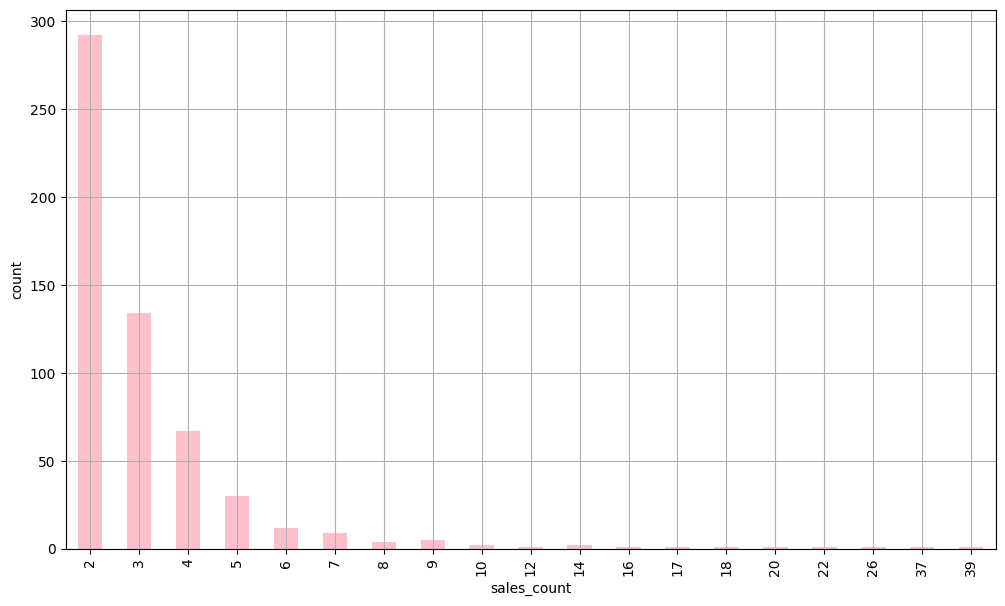

In [ ]:
# We filter on invoicedate_purchase_duration greater than 0
summary_dfkds4 = summary_dfkds3.loc[summary_dfkds3['invoicedate_purchase_duration'] >= 0]

ax = summary_dfkds4.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='pink',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

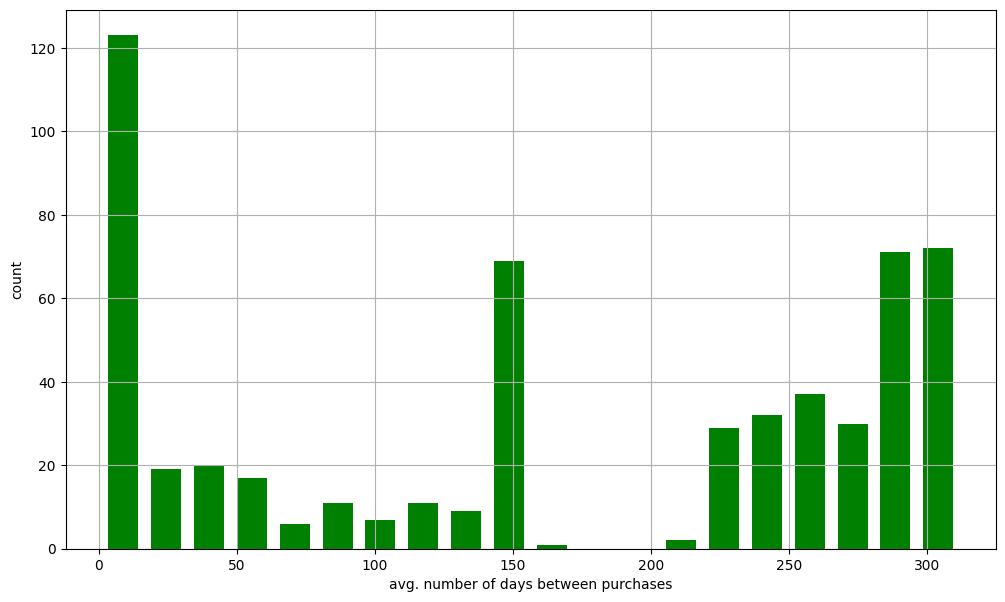

In [ ]:
# Now we create a distribution for the average times between sales
ax = summary_dfkds4['invoicedate_purchase_duration'].hist(bins=20, color='green', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

#Forecasting 4 month Customer Lifetime Value

In [ ]:
orders_dfkds.head()

Sales         InvoiceDate
CustomerID InvoiceNo                               
12347.0    537626     1201200.0 2020-12-07 14:57:00
12348.0    539318     1492920.0 2020-12-16 19:09:00
           568172     4433000.0 2021-09-25 13:13:00
12350.0    543037      820820.0 2021-02-02 16:01:00
12352.0    567505     5237375.0 2021-09-20 14:34:00

In [ ]:
# Create summary statistics in 4 month intervals for customer Sales

# Use 4M for 4 month
clv_freq = '4M'

# Groupby customer ID now, and group all invoices for 4 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_dfkds.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12347.0,2020-12-31,1201200.0,1201200.0,1
1,12348.0,2020-12-31,1492920.0,1492920.0,1
2,12348.0,2021-12-31,4433000.0,4433000.0,1
3,12350.0,2021-04-30,820820.0,820820.0,1
4,12352.0,2021-12-31,9044750.0,4522375.0,2


In [ ]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12347.0,2020-12-31,1201200.0,1201200.0,1,M_4
1,12348.0,2020-12-31,1492920.0,1492920.0,1,M_4
2,12348.0,2021-12-31,4433000.0,4433000.0,1,M_1
3,12350.0,2021-04-30,820820.0,820820.0,1,M_3
4,12352.0,2021-12-31,9044750.0,4522375.0,2,M_1


In [ ]:
data_df['M'].unique()

array(['M_4', 'M_1', 'M_3', 'M_2'], dtype=object)

In [ ]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4
CustomerID,,,,,,,,,
12347.0,NaN,NaN,1201200.0,NaN,NaN,1.0,NaN,NaN,1201200.0
12348.0,NaN,NaN,1492920.0,NaN,NaN,1.0,NaN,NaN,1492920.0
12350.0,NaN,820820.0,NaN,NaN,1.0,NaN,NaN,820820.0,NaN
12355.0,6569420.0,NaN,NaN,1.0,NaN,NaN,6569420.0,NaN,NaN
12359.0,NaN,1250535.0,NaN,NaN,1.0,NaN,NaN,1250535.0,NaN


In [ ]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_4M
2,12348.0,4433000.0
4,12352.0,9044750.0
7,12362.0,11868857.0
8,12364.0,1141140.0
9,12372.0,5478616.0


In [ ]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,CustomerID,CLV_4M
NaN,0.0,0.0,1201200.0,0.0,0.0,1.0,0.0,0.0,1201200.0,12347.0,0.0
2.0,0.0,0.0,1492920.0,0.0,0.0,1.0,0.0,0.0,1492920.0,12348.0,4433000.0
NaN,0.0,820820.0,0.0,0.0,1.0,0.0,0.0,820820.0,0.0,12350.0,0.0
NaN,6569420.0,0.0,0.0,1.0,0.0,0.0,6569420.0,0.0,0.0,12355.0,0.0
NaN,0.0,1250535.0,0.0,0.0,1.0,0.0,0.0,1250535.0,0.0,12359.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
NaN,6673953.0,240240.0,0.0,1.0,1.0,0.0,6673953.0,240240.0,0.0,18239.0,0.0
2348.0,5231369.0,0.0,0.0,1.0,0.0,0.0,5231369.0,0.0,0.0,18241.0,4209062.0
NaN,0.0,-90805.0,0.0,0.0,1.0,0.0,0.0,-90805.0,0.0,18250.0,0.0
NaN,0.0,1007292.0,0.0,0.0,1.0,0.0,0.0,1007292.0,0.0,18260.0,0.0


In [ ]:
sample_set_df.shape

(1040, 11)

#Using Linear Regression

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CUSTID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.4)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Get our y intercept
reg_fit.intercept_

-21834912.956142467

In [ ]:
# Get our coefficents
reg_fit.coef_

array([-1.16885217e+00, -4.13056110e-01, -3.81578974e+00, -3.61310821e+06,
        6.20008230e+06, -2.61111624e+06,  1.60639481e+00,  1.03862593e+00,
        5.99985334e+00,  1.49384111e+03])

In [ ]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,-1.168852e+00
1,sales_avg_M_3,-4.130561e-01
2,sales_avg_M_4,-3.815790e+00
3,sales_count_M_2,-3.613108e+06
4,sales_count_M_3,6.200082e+06
5,sales_count_M_4,-2.611116e+06
6,sales_sum_M_2,1.606395e+00
7,sales_sum_M_3,1.038626e+00
8,sales_sum_M_4,5.999853e+00
9,CustomerID,1.493841e+03


In [ ]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [ ]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.06302966902201024
4858719.1916034


In [ ]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.0630
Out-of-Sample R-Squared: 0.1989


In [ ]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 4858719.1916
Out-of-Sample MSE: 4520381.6851


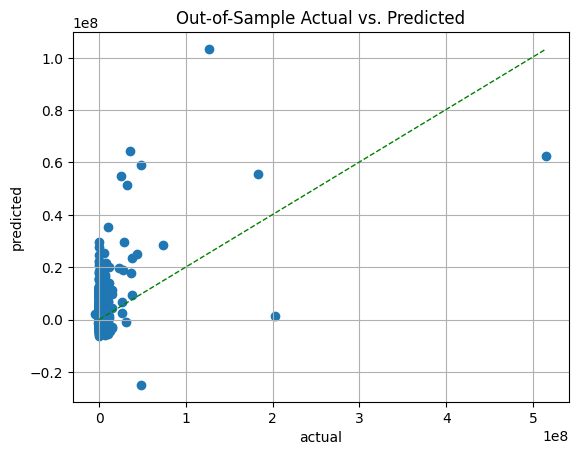

In [ ]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='green', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()